In [2]:
# NAME : MUHAMMAD RAYYAN KHAN
# ROLL NUMBER: 21B-209-SE
# SECTION: SE-A

# LAB TASKS

# TASK 1

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
heart_data = pd.read_csv("heart.csv")

In [7]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test_scaled)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951


# TASK 2

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
movies_data = pd.read_csv("IMDBdata_MainData.csv")
movies_data.fillna('', inplace=True)

In [21]:
features = movies_data[['Genre', 'Plot', 'Language']]
features = features.applymap(str)
features['Combined'] = features.apply(lambda row: ' '.join(row), axis=1)
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(features['Combined'])
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

In [22]:
def recommend_movies(movie_title, cosine_sim=cosine_sim):
    idx = movies_data[movies_data['Title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]
    return movies_data['Title'].iloc[movie_indices]

In [23]:
movie_title = "The Dark Knight"
recommended_movies = recommend_movies(movie_title)
print("Recommended movies for '{}':".format(movie_title))
print(recommended_movies)

Recommended movies for 'The Dark Knight':
3198                                  Broken Horses
151                           The Dark Knight Rises
1389               Sinbad: Legend of the Seven Seas
755                                       Alexander
907                               Kingdom of Heaven
329                               The King's Speech
1785                                            Ray
2005                                         Closer
1209                               We Were Soldiers
3980    Dolphins and Whales 3D: Tribes of the Ocean
Name: Title, dtype: object


# TASK 3

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

In [25]:
diabetes_data = pd.read_csv("diabetes.csv")

In [26]:
X = diabetes_data.drop(diabetes_data.columns[-1], axis=1)
mean = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

In [27]:
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [28]:
mahalanobis_distance = []
for i in range(len(X)):
    point = X.iloc[i]
    mahalanobis_dist = np.sqrt((point - mean).dot(inv_cov_matrix).dot((point - mean).T))
    mahalanobis_distance.append(mahalanobis_dist)

In [29]:
# threshold for outlier detection
alpha = 0.05  # significance level
df = X.shape[1]  # degrees of freedom
threshold = chi2.ppf(1 - alpha, df)

outlier_rows = diabetes_data[mahalanobis_distance > threshold]

print("Outlier rows detected based on Mahalanobis distance:")
print(outlier_rows)

Outlier rows detected based on Mahalanobis distance:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


# TASK 4

In [1]:
import pandas as pd

data = {
    'Speed': [4, 5, 7, 9, 13],
    'Agility': [3, 1, 2, 9, 7]
}

df = pd.DataFrame(data)

df.to_csv('speed-agility.csv', index=False)

print(df)

   Speed  Agility
0      4        3
1      5        1
2      7        2
3      9        9
4     13        7


In [2]:
import pandas as pd
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

df = pd.read_csv('speed-agility.csv')

In [3]:
points = df[['Speed', 'Agility']].values
kd_tree = KDTree(points)

In [4]:
def plot_kd_tree(points, kd_tree, ax, depth=0, bounds=None):
    if bounds is None:
        bounds = [[min(points[:, 0]), max(points[:, 0])], [min(points[:, 1]), max(points[:, 1])]]

    if len(points) == 0:
        return

    axis = depth % 2
    median_idx = len(points) // 2
    sorted_points = points[points[:, axis].argsort()]
    median_point = sorted_points[median_idx]

    if axis == 0:
        ax.plot([median_point[0], median_point[0]], bounds[1], 'k-')
        new_bounds = [bounds[0], [bounds[1][0], median_point[1]]]
    else:
        ax.plot(bounds[0], [median_point[1], median_point[1]], 'k-')
        new_bounds = [[bounds[0][0], median_point[0]], bounds[1]]

    # Recursively plot the left and right subtrees
    plot_kd_tree(sorted_points[:median_idx], kd_tree, ax, depth + 1, new_bounds)
    plot_kd_tree(sorted_points[median_idx + 1:], kd_tree, ax, depth + 1, new_bounds)


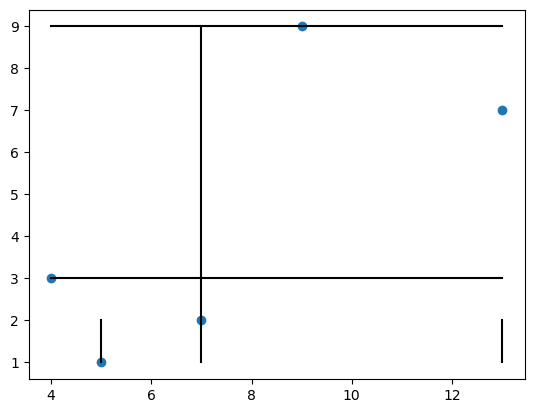

In [5]:
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])

# Plot the KD tree
plot_kd_tree(points, kd_tree, ax)

In [6]:
ax.set_xlabel('Speed')
ax.set_ylabel('Agility')
plt.show()

# TASK 5

In [21]:
import pandas as pd
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [22]:
data = {
    'Speed': [4, 5, 7, 9, 13],
    'Agility': [3, 1, 2, 9, 7]
}
df = pd.DataFrame(data)

In [23]:
X = df['Agility']
Y = df['Speed']

In [24]:
xy = list(zip(X, Y))

In [31]:
tree = KDTree(xy, leaf_size=2)

TypeError: KDTree.__init__() got an unexpected keyword argument 'leaf_size'

In [26]:
dist, ind = tree.query([[6.3, 3.5]], k=2)

In [27]:
print(df.iloc[ind[0]])
print(dist)

   Speed  Agility
0      4        3
1      5        1
[[3.33766385 5.50817574]]


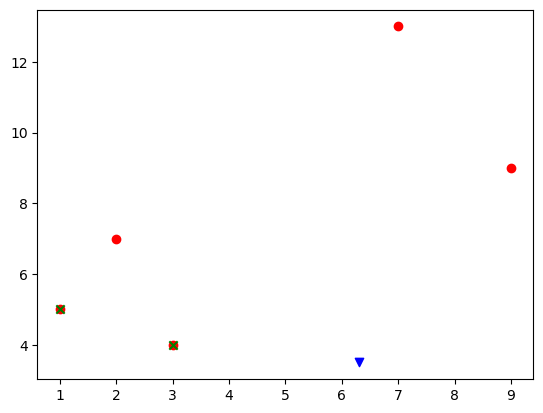

In [28]:
plt.scatter(X, Y, color='red', marker='o', label='Data points')
plt.scatter(6.3, 3.5, color='blue', marker='v', label='Query point')
nearest_points = df.iloc[ind[0]]
plt.scatter(nearest_points['Agility'], nearest_points['Speed'], color='green', marker='x', label='Nearest neighbors')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'KD-Tree Nearest Neighbors')

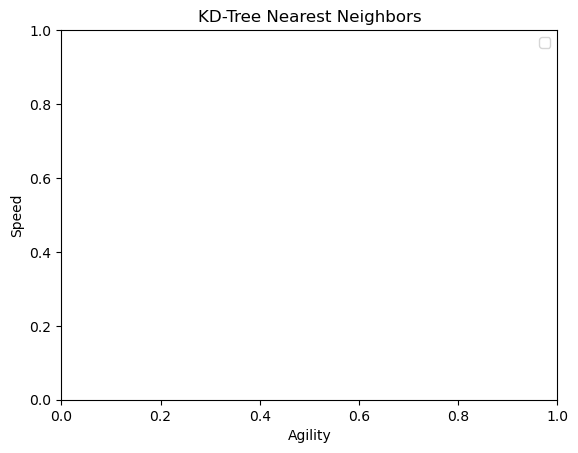

In [29]:
plt.xlabel('Agility')
plt.ylabel('Speed')
plt.legend()
plt.title('KD-Tree Nearest Neighbors')

In [30]:
plt.show()